![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

In [1]:
# !pip install seaborn

# **HOW TO MAKE A STRIP CHART FOR FINANCIAL ASSETS' RETURNS?**

## **Strip chart**

<font size="3"> This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use. A strip plot is a single-axis scatter plot that is used to visualise the distribution of many individual one-dimensional values. The values are plotted as dots along one unique axis. Typically, several strip plots are placed side by side to compare the distributions of data points among several values, categories or ranges. In the case of financial returns it is useful to have a visual inspection of the variability throughout the years<br><br> 
    
<font size="3"> In this notebook we will use Yahoo Finance Data and then plot it into a strip chart. If you want to know how to download the data from the yahoo finance API please take a look  <a href="https://quant-trading.co/how-to-download-data-from-yahoo-finance-api/" target="_blank">here</a>
<br><br>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, PercentFormatter

## **Download the data**

<font size="3"> We do as usual with the yahoo finance API. 
<br><br>

In [3]:
Ticker = 'AAPL'
my_ticker = yf.Ticker(Ticker)

#DATES
start_date = datetime.datetime(2004, 12, 31)
end_date = datetime.datetime(2024, 3, 31)

prices_hist = my_ticker.history(start=start_date,end=end_date)
prices_hist.reset_index(inplace=True)
prices_hist['perc_Dividends']=prices_hist['Dividends']/prices_hist['Close']
prices_hist['ret'] = prices_hist['Close']/ prices_hist['Close'].shift(1)-1+prices_hist['perc_Dividends']
prices_hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,perc_Dividends,ret
0,2004-12-31,0.980997,0.982660,0.967996,0.973589,278588800,0.0,0.0,0.0,NaN
1,2005-01-03,0.979334,0.984323,0.946377,0.956809,691992000,0.0,0.0,0.0,-0.017236
2,2005-01-04,0.964367,0.989765,0.951971,0.966636,1096810400,0.0,0.0,0.0,0.010270
3,2005-01-05,0.974496,0.986440,0.968298,0.975101,680433600,0.0,0.0,0.0,0.008758
4,2005-01-06,0.977671,0.981299,0.957413,0.975857,705555200,0.0,0.0,0.0,0.000775
...,...,...,...,...,...,...,...,...,...,...
4838,2024-03-22,171.759995,173.050003,170.059998,172.279999,71106600,0.0,0.0,0.0,0.005310
4839,2024-03-25,170.570007,171.940002,169.449997,170.850006,54288300,0.0,0.0,0.0,-0.008300
4840,2024-03-26,170.000000,171.419998,169.580002,169.710007,57388400,0.0,0.0,0.0,-0.006673
4841,2024-03-27,170.410004,173.600006,170.110001,173.309998,60273300,0.0,0.0,0.0,0.021213


In [4]:
#Y-AXIS MAX AND MIN VALUES  
min_value = prices_hist['ret'].min()
max_value = prices_hist['ret'].max()       

## **Create the strip chart**

   
<font size="3"> We will use the seaborn library, particularly the catplot function. Below you can find an example on how to do that.
<br><br>

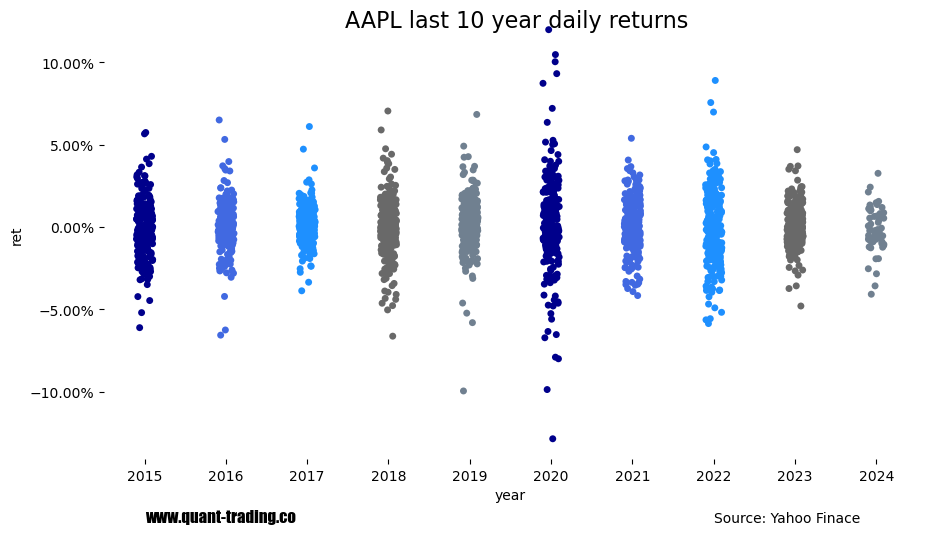

In [5]:
prices_hist['year'] = prices_hist['Date'].dt.year
df_last_years = prices_hist.loc[prices_hist['year']>=2015]
ax1 = sns.catplot(data=df_last_years, x="year", y="ret",
                  palette=sns.color_palette(['darkblue', 'royalblue','dodgerblue','dimgrey','slategrey']),
                  orient='v',
                  kind='strip')

ax1.fig.suptitle(Ticker +' last 10 year daily returns',x = 1.0, y = 1.0,fontsize = 16)

for ax in ax1.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1,decimals=2))
    ax.text(0, min_value,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')
    ax.text(7, min_value,'Source: Yahoo Finace' , color='black', fontsize=10)
    

plt.box(on=None)
plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)
plt.show()

If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)